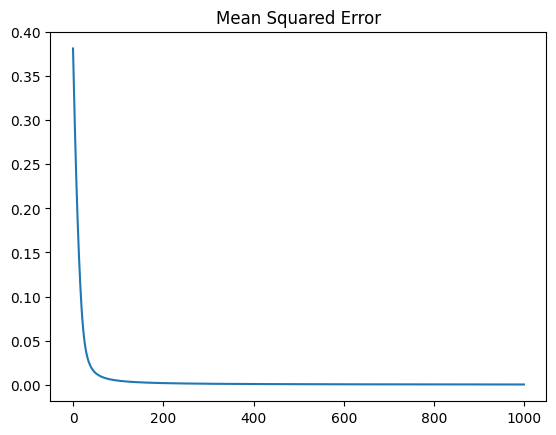

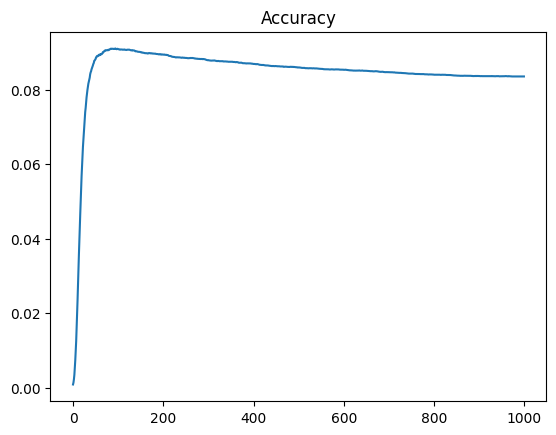

Test Accuracy: 0.08


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean()

def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

def load_data(train_path, test_path):
    train_data = pd.read_csv(train_path)
    test_data = pd.read_csv(test_path)

    if train_data.isnull().values.any():
        train_data = train_data.dropna()
    if test_data.isnull().values.any():
        test_data = test_data.dropna()

    X_train = train_data.iloc[:, :-1].values
    y_train = train_data.iloc[:, -1].values
    X_test = test_data.iloc[:, :-1].values
    y_test = test_data.iloc[:, -1].values

    return X_train, y_train, X_test, y_test

def preprocess_data(X, y):
    X = X / 255.0
    y_encoded = np.zeros((y.size, int(y.max()) + 1))
    y_encoded[np.arange(y.size), y.astype(int)] = 1
    return X, y_encoded

train_path = 'mnist_train.csv'
test_path = 'mnist_test.csv'

X_train, y_train, X_test, y_test = load_data(train_path, test_path)
X_train, y_train = preprocess_data(X_train, y_train)
X_test, y_test = preprocess_data(X_test, y_test)

learning_rate = 0.1
iterations = 1000

input_size = 784
hidden_size = 66
output_size = 10

np.random.seed(10)
w1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))
w2 = np.random.normal(scale=0.5, size=(hidden_size, output_size))

results = pd.DataFrame(columns=["mse", "accuracy"])
N = y_train.shape[0]

for itr in range(iterations):
    z1 = np.dot(X_train, w1)
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2)
    a2 = sigmoid(z2)

    mse = mean_squared_error(a2, y_train)
    acc = accuracy(a2, y_train)
    results = pd.concat([results, pd.DataFrame({"mse": [mse], "accuracy": [acc]})], ignore_index=True)

    e2 = a2 - y_train
    dw2 = np.dot(a1.T, e2 * sigmoid_derivative(a2)) / N

    e1 = np.dot(e2 * sigmoid_derivative(a2), w2.T)
    dw1 = np.dot(X_train.T, e1 * sigmoid_derivative(a1)) / N

    w1 -= learning_rate * dw1
    w2 -= learning_rate * dw2

plt.figure()
results.mse.plot(title="Mean Squared Error")
plt.figure()
results.accuracy.plot(title="Accuracy")
plt.show()

z1 = np.dot(X_test, w1)
a1 = sigmoid(z1)
z2 = np.dot(a1, w2)
a2 = sigmoid(z2)
test_acc = accuracy(a2, y_test)
print("Test Accuracy: {:.2f}".format(test_acc))
